In [4]:
import pandas as pd
import numpy as np
import scipy
from scipy import ndimage

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#NZLCC1 = pd.read_csv('/home/j2/Desktop/PythonTry/MLshm/MLRTMwithExperiment/rectx002y006/iter00000/bnzlcc.csv',header=None)

In [5]:
def implt(image):
    plt.imshow(ndimage.rotate(image,90))
    plt.show()

#implt(NZLCC1)

def implt2(Y_train,Y_recovered,index):
    #gs = gridspec.GridSpec(1,2, height_ratios=[1,1])
    #fig = plt.figure()
    plt.figure(figsize=(12, 7))
    ax1 = plt.subplot(121)
    ax1.imshow(ndimage.rotate(Y_train[index,:].reshape(401,401),90))
    plt.title("Original", fontsize=16)
    ax2 = plt.subplot(122)
    ax2.imshow(ndimage.rotate(Y_recovered[index,:].reshape(401,401),90))
    plt.title("Compressed", fontsize=16)
    plt.show()

def implt3(Y_train,Y_recovered,idx,idy):
    #gs = gridspec.GridSpec(1,2, height_ratios=[1,1])
    #fig = plt.figure()
    index=dfX.index[(dfX['x (mm)'] == idx) & (dfX['y (mm)'] == idy)]
    plt.figure(figsize=(8, 5))
    ax1 = plt.subplot(121)
    ax1.imshow(ndimage.rotate(Y_train[index,:].reshape(401,401),90))
    plt.title("Original", fontsize=16)

    ax2 = plt.subplot(122)
    ax2.imshow(ndimage.rotate(Y_recovered.reshape(401,401),90))
    plt.title("Predicted", fontsize=16)
     
    plt.show()
    
    

# define the width and length arrays 

rect_spc_x=0.001;
rect_spc_y=0.001;

rect_array_x = np.zeros(54)
rect_array_y = np.zeros(54)

for ix in range(54):
    rect_array_x[ix]=(rect_spc_x*(ix+1))/2

for iy in range(54):
    rect_array_y[iy]=(rect_spc_y*(iy+1))/2

    
plt.plot(range(54),rect_array_x,'.')
#plt.show()

In [16]:
thold = 0.015


file_nametxt ='iput/matrix2DLong%04d.txt' % (thold*1000)
file_nametxtx ='iput/mx%04d.txt' % (thold*1000)
file_nametxty ='iput/my%04d.txt' % (thold*1000)

image2DLong = np.loadtxt(file_nametxt)
X = np.loadtxt(file_nametxtx)
Y = np.loadtxt(file_nametxty)






In [25]:
df = pd.read_csv('sumValuesThrhPer20.csv')
dfX = df[['x (mm)','y (mm)']]

In [11]:
# # load, slice, and reshape 2D image into to 1D array 

# xrange = range(2,42+1,4)
# yrange = range(2,42+1,4)
# rect_ixx = np.zeros(len(xrange))
# rect_iyy = np.zeros(len(yrange))

# totalIndex = 0 
# thold = 0.2 

# for ixx in range(2,42+1,4): 
#     for iyy in range(2,42+1,4):
#         rect_ixx = rect_array_x[ixx]
#         rect_iyy = rect_array_y[iyy]
         
#         totalIndex += 1 
#         Dxmm = int(round(2*rect_ixx*1e3-1))    
#         Dymm = int(round(2*rect_iyy*1e3-1))
#         parafilename = '/home/j2/Desktop/PythonTry/MLshm/MLRTMwithExperiment/rectx%03dy%03d/iter00000/bnzlcc.csv' % (Dxmm,Dymm)
#         temp = pd.read_csv(parafilename,header=None).values
        
#         #tempfilter
        
#         image3D = np.dstack((image3D, temp)) 
#         tempLong= temp.reshape(401*401,1)
#         image2DLong = np.dstack((image2DLong,tempLong))
#         #print(Dxmm,Dymm)
#         #print(Dymm)

# # get rid of the starting image         
# imagefinal3D = image3D[:,:,1:]
# imagefinal2DLong = np.transpose(image2DLong[:,:,1:].reshape(160801,121))

# print(imagefinal3D.shape)
# print(imagefinal2DLong.shape)

# implt(imagefinal2DLong[20,:].reshape(401,401))

In [12]:
# # prepare the width, length input 

# df = pd.read_csv('sumValuesThrhPer20.csv')
# dfX = df[['x (mm)','y (mm)']]

# dfY = df[["Area (mm^2)","Length (mm)","Width (mm)","x_center","y_center","max value"]]

# X=dfX.values
# Y = imagefinal2DLong
# print(X.shape)
# print(Y.shape)


In [9]:
import keras
from sklearn.model_selection import cross_val_score, train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop 





Selected principal space dimensions =  8
explained_variance_ratio 0.995409739558
shape of reduced all image data (121, 8)
shape of reduced all recovered image data (121, 160801)


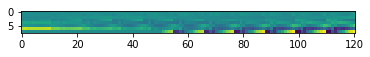

In [78]:
# PCA for all the images 

Y = image2DLong

from sklearn.decomposition import PCA

tholdPCA = 0.995

pca = PCA()
pca.fit(Y)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= tholdPCA) + 1

print('Selected principal space dimensions = ', d)

pca = PCA(n_components=d)
Y_reduced = pca.fit_transform(Y)

pca.n_components_
print('explained_variance_ratio', np.sum(pca.explained_variance_ratio_))

# reconstructed PCA-compressed images
Y_recovered = pca.inverse_transform(Y_reduced)

print('shape of reduced all image data', Y_reduced.shape)
print('shape of reduced all recovered image data',Y_recovered.shape)

implt(Y_reduced)

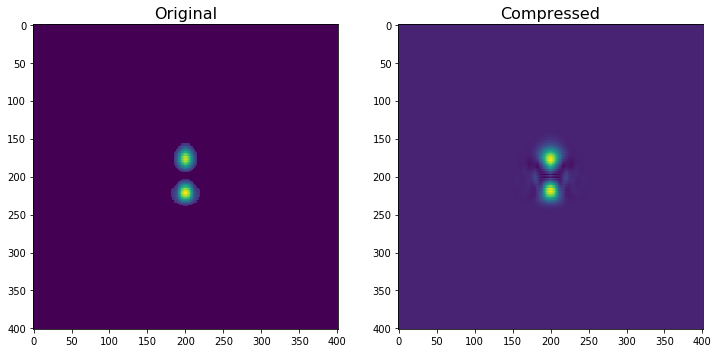

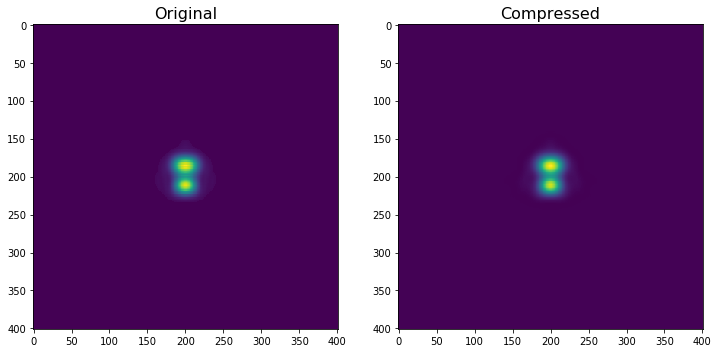

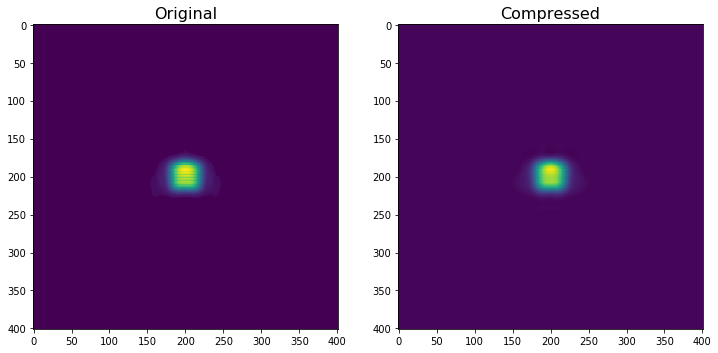

In [79]:
implt2(Y,Y_recovered,10)
implt2(Y,Y_recovered,60)
implt2(Y,Y_recovered,90)

In [80]:
############## Data Normalization and train-test split 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

Ynorm = Y_reduced

#dfXnorm = dfX.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
Xnorm= X

Xnorm_train, Xnorm_test, Y3norm_train, Y3norm_test = train_test_split(Xnorm, Ynorm, test_size=0.01, random_state=0)
print(Xnorm_train.shape)
print(Xnorm_test.shape)
print(Y3norm_train.shape)
print(Y3norm_test.shape)

#Xnorm_train

(119, 2)
(2, 2)
(119, 8)
(2, 8)


In [81]:
directory = 'imagetry'


import os, errno

try:
    os.makedirs(directory)
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
def NNpredcheck(x,y):

    Yt1 = model.predict(np.array([[x, y]]))
    Yt1recover = pca.inverse_transform(Yt1).reshape(401,401)
    plt.imshow(ndimage.rotate(Yt1recover,90))
    titlename = 'x = %d y = %d' % (x,y)
    plt.title(titlename)
    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_170 (Dense)            (None, 20)                60        
_________________________________________________________________
dense_171 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_172 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_173 (Dense)            (None, 8)                 168       
Total params: 1,068
Trainable params: 1,068
Non-trainable params: 0
_________________________________________________________________
width and length =  [[ 18.  18.]]
predicted =  [[ 0.58325779 -0.06242532 -0.03694979  0.02767136  0.03755158  0.11053443
  -0.25028694 -0.2055098 ]]
labeled =  [-0.38367809  0.0573634  -0.4576528  -0.20466778 -0.12582127  0.04311632
  0.10618333 -0.00190569]
Ratio =  [[ -

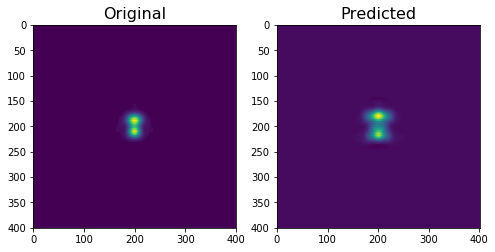

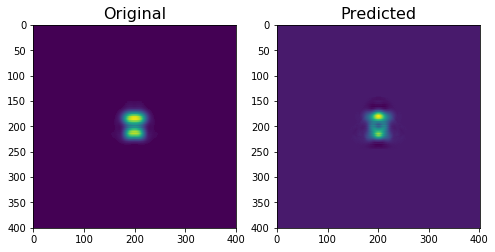

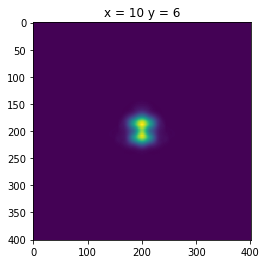

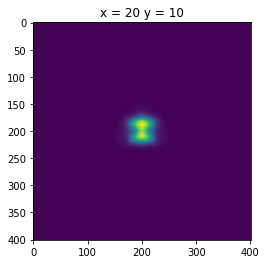

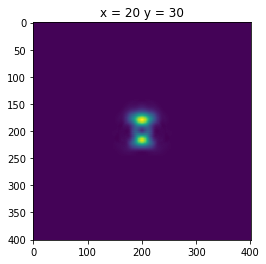

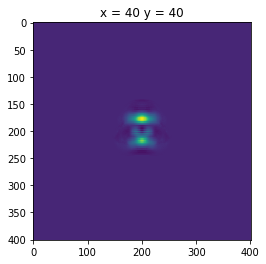

In [96]:
k

def create_model(d,k)
    model = Sequential()
 
    #odel.add(Dense(1000, activation='relu', input_shape=(2,)))
    model.add(Dense(k, activation='relu', input_shape=(2,)))
    #model.add(Dense(10000, activation='relu'))
    model.add(Dense(k, activation='relu'))
    #model.add(Dense(140, activation='relu'))
    model.add(Dense(k, activation='relu'))
    model.add(Dense(d))
    return model

model = create_model(d,k)
model.summary()

model.compile(loss='mse',
              optimizer=RMSprop(),
              metrics=['accuracy'])
#mse
#categorical_crossentropy
history = model.fit(Xnorm_train, Y3norm_train,
                    batch_size=12,
                    epochs=10,
                    verbose=0,
                    validation_data=(Xnorm_test, Y3norm_test))
 #indexnumber = 1
for irad in range(2):
    indexnumber = irad
    #print('index number is =', indexnumber)
    print('width and length = ', Xnorm_test[indexnumber,:].reshape(1,-1) )
    print('predicted = ', model.predict(Xnorm_test[indexnumber,:].reshape(1,-1) ))
    print('labeled = ', Y3norm_test[indexnumber,:])
    print('Ratio = ', model.predict(Xnorm_test[indexnumber,:].reshape(1,-1) )/Y3norm_test[indexnumber,:])
    
for i in range(2):
    Yt1 = model.predict(Xnorm_test[i,:].reshape(1,-1))
    Yt1recover = pca.inverse_transform(Yt1)
    implt3(Y,Yt1recover,Xnorm_test[i,:][0],Xnorm_test[i,:][1])
    path = "%s%s%d" % (directory, '/test',i)
    #plt.savefig(path, format='png', dpi=300)
        
NNpredcheck(10,6)
NNpredcheck(20,10)
NNpredcheck(20,30)
NNpredcheck(40,40)